# Day 2

Today, we will start using nf-core pipelines to find differentially abundant genes in our dataset. 
We are using data from the following paper: https://www.nature.com/articles/s41593-023-01350-3#Sec10

1. Please take some time to read through the paper and understand their approach, hypotheses and goals.

What was the objective of the study?

- The goal of this study was to understand how withdrawing from oxycodone affects gene expression in the brain's reward system, especially when there is also chronic pain involved. They used a mouse model with a peripheral nerve injury (SNI) to see how oxycodone withdrawal impacts the brain differently in those with chronic pain versus those without. They also tested whether a drug that inhibits HDAC1/HDAC2 could help lessen the negative effects of withdrawal.

What do the conditions mean?

- oxy: group of mice treated with oxycodone


- sal: control group which received a saline solution

What do the genotypes mean?

- SNI: Spared Nerve Injury, which means these mice have nerve damage, simulating chronic pain.


- Sham: These mice underwent a fake surgery without nerve damage, so they represent a pain-free state.

Imagine you are the bioinformatician in the group who conducted this study. They hand you the raw files and ask you to analyze them.

What would you do?

Which groups would you compare to each other?

Please also mention which outcome you would expect to see from each comparison.

- I would first look at tge data and perform exploratory data analysis as well as data preprocessing. Normalizing the data can also help.

- Then I would look for differently expressed genes between the different groups (i.e. comparison of SNI-Oxy and SNI-Sal) to look for genes affected by this oxydone withdrawl.

- Afterwards, we could dive deeper into the biological processes, trying to find pathways or molecules (i.e. enzymes) that are impacted leading to these results.

- Nice to have are also plots to visualize the data.

- At the end, the ideal outcome would be to link the shown changes in the gene expression with changes in behaviour of those mice.

We can compare the groups SNI-Oxy vs SNI-Sal, Sham-Oxy vs. Sham-Sal SNI-Oxy vs. Sham-Oxy or SNI-Sal vs. Sham-Sal depending on the research question we want to answer. The goal is to detect whether HDAC1/HADAC2 inhibition could be a helpful treatment to handle withdrawal symptoms.

SNI-Oxy vs. SNI-Sal: 
- How does oxycodone withdrawal affects mice with chronic pain?
- Expected Outcome: Changes in genes related to stress, dysregulation of the reward system, and inflammation. This should show that withdrawal is particularly tough on mice with chronic pain.

Sham-Oxy vs. Sham-Sal:
- How does withdrawal affects mice without any pain?
- Expected Outcome: No chronic pain but changes in the brain's reward system which reflect the withdrawal symptoms.

SNI-Oxy vs. Sham-Oxy:
- How does chronic pain alter the effects of oxydone withdrawal?
- Expected Outcome: Withdrawal should have more severe effects in the SNI group than in the Sham group.

SNI-Sal vs. Sham-Sal:
- What is the impact of the nerve injury by itself, without the influence of oxycodone?
- Expected Outcome: Changes in genes which are related to the nerve injury

Your group gave you a very suboptimal excel sheet (conditions_runs_oxy_project.xlsx) to get the information you need for each run they uploaded to the SRA.<br>
So, instead of directly diving into downloading the data and starting the analysis, you first need to sort the lazy table.<br>
Use Python and Pandas to get the table into a more sensible order.<br>
Then, perform some overview analysis and plot the results
1. How many samples do you have per condition?
2. How many samples do you have per genotype?
3. How often do you have each condition per genotype?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the datasets
df1 = pd.read_excel('conditions_runs_oxy_project.xlsx')
df2 = pd.read_csv('base_counts.csv')

In [4]:
# Show the first few lines of dataframe 1
df1.head

<bound method NDFrame.head of    Patient          Run RNA-seq  DNA-seq condition: Sal Condition: Oxy  \
0        ?  SRR23195505       x      NaN              x            NaN   
1        ?  SRR23195506       x      NaN            NaN              x   
2        ?  SRR23195507       x      NaN              x            NaN   
3        ?  SRR23195508       x      NaN            NaN              x   
4        ?  SRR23195509       x      NaN            NaN              x   
5        ?  SRR23195510       x      NaN              x            NaN   
6        ?  SRR23195511       x      NaN            NaN              x   
7        ?  SRR23195512       x      NaN              x            NaN   
8        ?  SRR23195513       x      NaN              x            NaN   
9        ?  SRR23195514       x      NaN            NaN              x   
10       ?  SRR23195515       x      NaN              x            NaN   
11       ?  SRR23195516       x      NaN            NaN              x   
12      

In [5]:
print(df1.columns)

Index(['Patient', 'Run', 'RNA-seq', 'DNA-seq', 'condition: Sal',
       'Condition: Oxy', 'Genotype: SNI', 'Genotype: Sham'],
      dtype='object')


In [6]:
# Show the first few lines of dataframe 2
df2.head

<bound method NDFrame.head of             Run       Bases
0   SRR23195505  6922564500
1   SRR23195506  7859530800
2   SRR23195507  8063298900
3   SRR23195508  6927786900
4   SRR23195509  7003550100
5   SRR23195510  7377388500
6   SRR23195511  6456390900
7   SRR23195512  7462857900
8   SRR23195513  8099181600
9   SRR23195514  7226808600
10  SRR23195515  8169101700
11  SRR23195516  6203117700
12  SRR23195517  6863840400
13  SRR23195518  7908500400
14  SRR23195519  6996050100
15  SRR23195520  7858146000>

In [7]:
# Create new 'Condition' column
df1['Condition'] = df1.apply(lambda row: 'Sal' if row['condition: Sal'] == 'x' else 'Oxy', axis=1)

# Create new 'Genotype' column
df1['Genotype'] = df1.apply(lambda row: 'SNI' if row['Genotype: SNI'] == 'x' else 'Sham', axis=1)

# Drop the original columns
df1.drop(columns=['condition: Sal', 'Condition: Oxy', 'Genotype: SNI', 'Genotype: Sham'], inplace=True)

# Display the updated DataFrame
print(df1)


   Patient          Run RNA-seq  DNA-seq Condition Genotype
0        ?  SRR23195505       x      NaN       Sal      SNI
1        ?  SRR23195506       x      NaN       Oxy     Sham
2        ?  SRR23195507       x      NaN       Sal     Sham
3        ?  SRR23195508       x      NaN       Oxy      SNI
4        ?  SRR23195509       x      NaN       Oxy      SNI
5        ?  SRR23195510       x      NaN       Sal      SNI
6        ?  SRR23195511       x      NaN       Oxy     Sham
7        ?  SRR23195512       x      NaN       Sal     Sham
8        ?  SRR23195513       x      NaN       Sal      SNI
9        ?  SRR23195514       x      NaN       Oxy     Sham
10       ?  SRR23195515       x      NaN       Sal     Sham
11       ?  SRR23195516       x      NaN       Oxy      SNI
12       ?  SRR23195517       x      NaN       Oxy      SNI
13       ?  SRR23195518       x      NaN       Sal      SNI
14       ?  SRR23195519       x      NaN       Oxy     Sham
15       ?  SRR23195520       x      NaN

In [8]:
# Sort the DataFrame by 'Genotype'
sorted_by_genotype = df1.sort_values(by='Genotype')

print("\nDataFrame sorted by Genotype:")
print(sorted_by_genotype)


DataFrame sorted by Genotype:
   Patient          Run RNA-seq  DNA-seq Condition Genotype
0        ?  SRR23195505       x      NaN       Sal      SNI
3        ?  SRR23195508       x      NaN       Oxy      SNI
4        ?  SRR23195509       x      NaN       Oxy      SNI
5        ?  SRR23195510       x      NaN       Sal      SNI
8        ?  SRR23195513       x      NaN       Sal      SNI
11       ?  SRR23195516       x      NaN       Oxy      SNI
12       ?  SRR23195517       x      NaN       Oxy      SNI
13       ?  SRR23195518       x      NaN       Sal      SNI
1        ?  SRR23195506       x      NaN       Oxy     Sham
2        ?  SRR23195507       x      NaN       Sal     Sham
6        ?  SRR23195511       x      NaN       Oxy     Sham
7        ?  SRR23195512       x      NaN       Sal     Sham
9        ?  SRR23195514       x      NaN       Oxy     Sham
10       ?  SRR23195515       x      NaN       Sal     Sham
14       ?  SRR23195519       x      NaN       Oxy     Sham
15       

In [9]:
# Sort the DataFrame by 'Condition'
sorted_by_condition = df1.sort_values(by='Condition')

print("\nDataFrame sorted by Condition:")
print(sorted_by_condition)


DataFrame sorted by Condition:
   Patient          Run RNA-seq  DNA-seq Condition Genotype
1        ?  SRR23195506       x      NaN       Oxy     Sham
3        ?  SRR23195508       x      NaN       Oxy      SNI
4        ?  SRR23195509       x      NaN       Oxy      SNI
6        ?  SRR23195511       x      NaN       Oxy     Sham
9        ?  SRR23195514       x      NaN       Oxy     Sham
11       ?  SRR23195516       x      NaN       Oxy      SNI
12       ?  SRR23195517       x      NaN       Oxy      SNI
14       ?  SRR23195519       x      NaN       Oxy     Sham
0        ?  SRR23195505       x      NaN       Sal      SNI
2        ?  SRR23195507       x      NaN       Sal     Sham
5        ?  SRR23195510       x      NaN       Sal      SNI
7        ?  SRR23195512       x      NaN       Sal     Sham
8        ?  SRR23195513       x      NaN       Sal      SNI
10       ?  SRR23195515       x      NaN       Sal     Sham
13       ?  SRR23195518       x      NaN       Sal      SNI
15      

In [10]:
# How many samples do you have per condition?
condition_counts = df1['Condition'].value_counts()
print("Samples per condition:")
print(condition_counts)

Samples per condition:
Sal    8
Oxy    8
Name: Condition, dtype: int64


/tmp/ipykernel_1129/1047194094.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=condition_counts.index, y=condition_counts.values, palette='viridis')


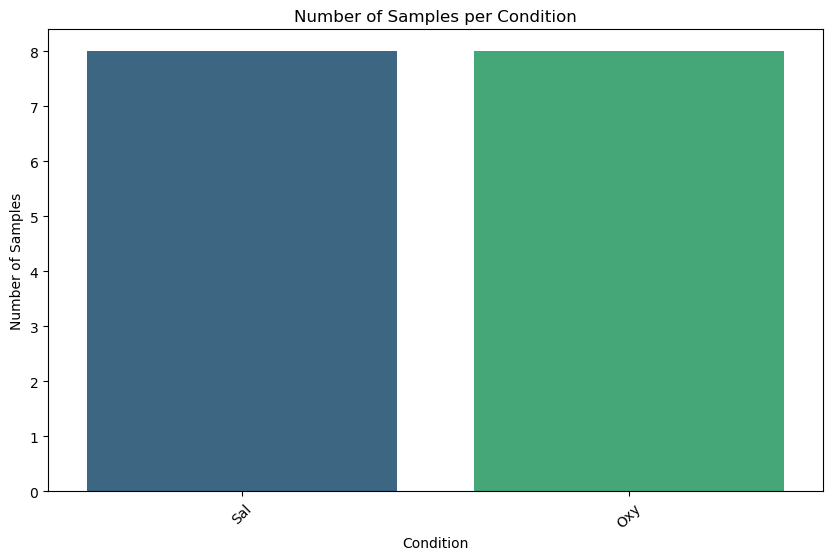

In [16]:
# Bar plot for number of samples per condition
plt.figure(figsize=(10, 6))
sns.barplot(x=condition_counts.index, y=condition_counts.values, palette='viridis')
plt.title('Number of Samples per Condition')
plt.xlabel('Condition')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.show()

In [11]:
# How many samples do you have per genotype?
genotype_counts = df1['Genotype'].value_counts()
print("\nSamples per genotype:")
print(genotype_counts)


Samples per genotype:
SNI     8
Sham    8
Name: Genotype, dtype: int64


/tmp/ipykernel_1129/143000047.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genotype_counts.index, y=genotype_counts.values, palette='magma')


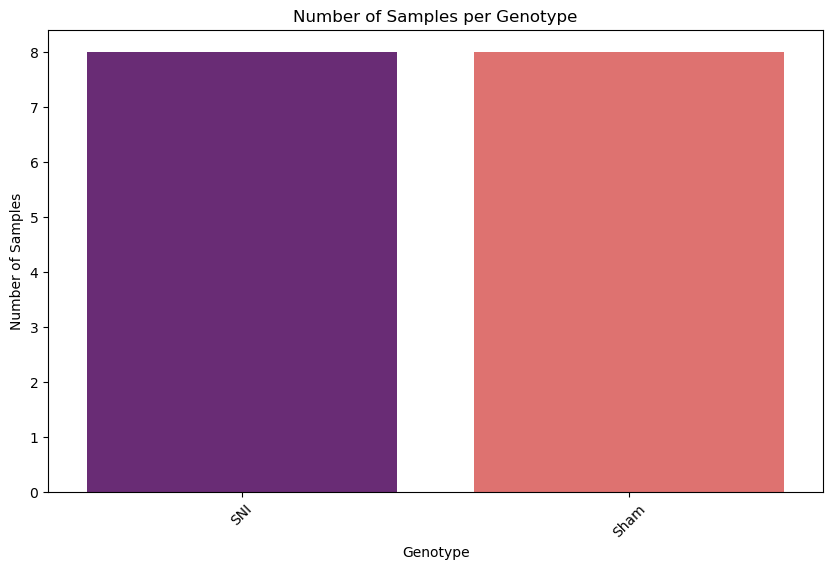

In [17]:
# Bar plot for number of samples per genotype
plt.figure(figsize=(10, 6))
sns.barplot(x=genotype_counts.index, y=genotype_counts.values, palette='magma')
plt.title('Number of Samples per Genotype')
plt.xlabel('Genotype')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.show()

In [12]:
# How often do you have each condition per genotype?
condition_genotype_counts = df1.groupby(['Genotype', 'Condition']).size().unstack(fill_value=0)
print("\nCondition counts per genotype:")
print(condition_genotype_counts)


Condition counts per genotype:
Condition  Oxy  Sal
Genotype           
SNI          4    4
Sham         4    4


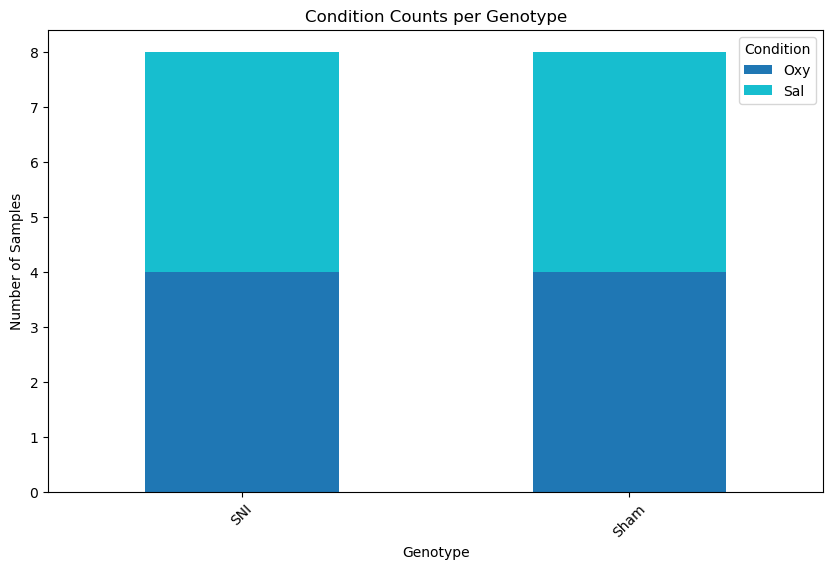

In [19]:
# Plot 3: Stacked bar plot for condition counts per genotype
condition_genotype_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab10')
plt.title('Condition Counts per Genotype')
plt.xlabel('Genotype')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.legend(title='Condition')
plt.show()

1. How many samples do you have per condition?
- Sal: 8 samples, Oxy: 8 samples
2. How many samples do you have per genotype?
- SNI: 8 samples, Sham: 8 samples
3. How often do you have each condition per genotype?
- Oxy/ SNI: 4 samples, Oxy/Sham: 4 samples, Sal/SNI: 4 samples, Sal/Sham: 4 samples

They were so kind to also provide you with the information of the number of bases per run, so that you can know how much space the data will take on your Cluster.<br>
Add a new column to your fancy table with this information (base_counts.csv) and sort your dataframe according to this information and the condition.

Then select the 2 smallest runs from your dataset and download them from SRA (maybe an nf-core pipeline can help here?...)

In [13]:
# Merge the base counts with df1
df_merged = pd.merge(df1, df2, how='left', left_on='Run', right_on='Run')

# Step 3: Sort the DataFrame by Bases and then by Condition
df_sorted_by_bases = df_merged.sort_values(by='Bases')
df_sorted_by_condition = df_merged.sort_values(by='Condition')

# Step 4: Select the 2 smallest runs
smallest_runs = df_merged.nsmallest(2, 'Bases')

# Display the outputs
print("\nMerged DataFrame:")
print(df_merged)
print("\nSorted DataFrame by Bases:")
print(df_sorted_by_bases)
print("\nSorted DataFrame by Condition:")
print(df_sorted_by_condition)
print("\nTwo smallest runs:")
print(smallest_runs)

# Extract the 'Run' column
run_names = smallest_runs['Run']

# Save to CSV, with each run name on a new line
run_names.to_csv('smallest_runs.csv', index=False, header=False)




Merged DataFrame:
   Patient          Run RNA-seq  DNA-seq Condition Genotype       Bases
0        ?  SRR23195505       x      NaN       Sal      SNI  6922564500
1        ?  SRR23195506       x      NaN       Oxy     Sham  7859530800
2        ?  SRR23195507       x      NaN       Sal     Sham  8063298900
3        ?  SRR23195508       x      NaN       Oxy      SNI  6927786900
4        ?  SRR23195509       x      NaN       Oxy      SNI  7003550100
5        ?  SRR23195510       x      NaN       Sal      SNI  7377388500
6        ?  SRR23195511       x      NaN       Oxy     Sham  6456390900
7        ?  SRR23195512       x      NaN       Sal     Sham  7462857900
8        ?  SRR23195513       x      NaN       Sal      SNI  8099181600
9        ?  SRR23195514       x      NaN       Oxy     Sham  7226808600
10       ?  SRR23195515       x      NaN       Sal     Sham  8169101700
11       ?  SRR23195516       x      NaN       Oxy      SNI  6203117700
12       ?  SRR23195517       x      NaN     

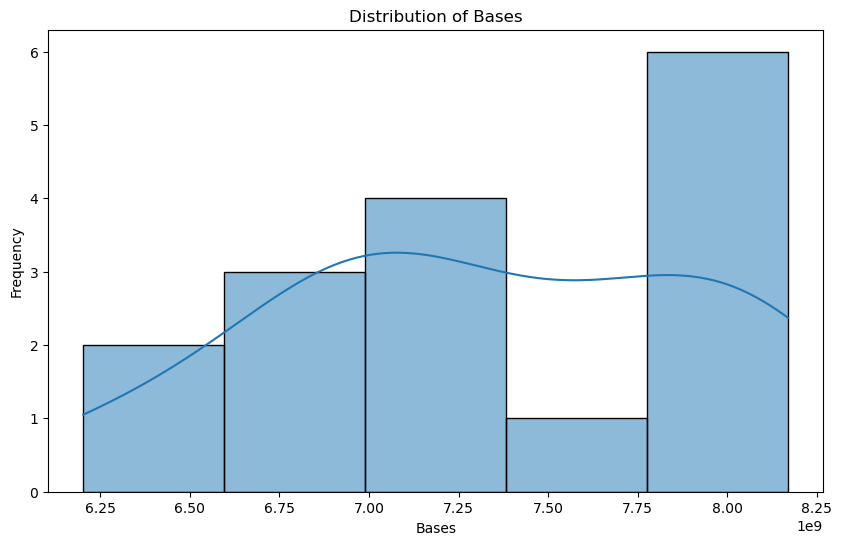

In [20]:
# Distribution of 'Bases' for merged DataFrame
plt.figure(figsize=(10, 6))
sns.histplot(df_merged['Bases'], kde=True)
plt.title('Distribution of Bases')
plt.xlabel('Bases')
plt.ylabel('Frequency')
plt.show()


In [21]:
! nextflow run nf-core/fetchngs -r 1.12.0 -profile docker --input smallest_runs.csv --outdir /home/tabea/ComputationalWorkflows/Tag2/SRA_files

Nextflow 24.04.4 is available - Please consider updating your version to it
N E X T F L O W  ~  version 23.10.0
Launching `https://github.com/nf-core/fetchngs` [curious_becquerel] DSL2 - revision: 8ec2d934f9 [1.12.0]
WARN: Access to undefined parameter `monochromeLogs` -- Initialise it to a default value eg. `params.monochromeLogs = some_value`


------------------------------------------------------
                                        ,--./,-.
        ___     __   __   __   ___     /,-._.--~'
  |\ | |__  __ /  ` /  \ |__) |__         }  {
  | \| |       \__, \__/ |  \ |___     \`-._,-`-,
                                        `._,._,'
  nf-core/fetchngs v1.12.0-g8ec2d93
------------------------------------------------------
Core Nextflow options
  revision       : 1.12.0
  runName        : curious_becquerel
  containerEngine: docker
  launchDir      : /home/tabea/ComputationalWorkflows/Tag2/day2/day2
  workDir        : /home/tabea/ComputationalWorkflows/Tag2/day2/day2/work
  proj

While your files are downloading, get back to the paper and explain how you would try to reproduce the analysis.<br>
When you are done with this shout, so we can discuss the different ideas.

After data acquisition and data preprocessing, we do the following steps:
1. Differential Gene Expression Analysis: First, quantify the features (aligned reads) and generate counts for each gene. Afterwards, normalize the data.
Identify differentially expressed genes between the different treatment groups (i.e. SNI-Oxy vs. SNI-Sal, Sham-Oxy vs. Sham-Sal, etc.).
2. Perform Gene Ontology enrichment and pathway analysis to understand the biological processes affected. In this case, compare the differences between the genotypes and treatment conditions.
3. Behavioral Data Analysis: Use different statistical analysis methods to analyze the behavioural data and to evaluate the interaction between conditions. You can plot the results.
4. Correlation Analysis: Correlate the data from the behavioral analysis with the gene expression data.
5. Replicate the experiments to verify the findings.
6. Perform upstream analysis to identify key regulators (in this case HDAC1/HDAC2).
7. Analyze how the treatment with the HDAC1/HDAC2 inhibitor affects transcriptional maladaptations.

Automate certain processes using nf-core and nextflow.